# Lab Assignment Four: Evaluation and Multi-Layer Perceptron
**- Wen Yang (47781972)**  
**- Ziling Feng (47781816)**  
**- Zheqi Wang (47711564)**  
**- Beichen Hu (47809766)**  

## Data Preparation (15 points total)   


## Business Understanding  
ASL stands for American Sign Language, ASL emerged as a language in the American School for the Deaf (ASD), founded in 1817. A reliable estimate for ASL users in the United States ranges from 250,000 to 500,000, including some deaf children. Moreover, ASL is not only important for deaf people, we believe that this language is also very important for children nowadays, and this language should be widely promoted to primary schools.  

There are 26 letters, A-Z, and three other gestures, which are spaces, nothing and delete, in our data package. There are 10,440 images, and all of them are 200*200 in size.  

I think the police will be interested in our prediction model. We think about this because we received the Amber alert on the phone previously, meaning that the children were kidnapped. If there is no way to cry out for help during the process of being kidnapped, ASL gestures would be useful. Children who have been kidnapped and learned ALS gestures can use ASL gestures anywhere in the camera and monitoring, such as SOS, surrounding conditions, etc. In this way, the police can take screenshots according to the camera and monitoring. Sometimes the pixels of the pictures are not so clear to recognize the gestures by people, then we can use our model. 
We could know the specific gestures through running the model in order to provide some clues and police could rescue them much faster.  

This model is an offline model, because the model is used after the kidnapping. The police can use the camera to capture the unclear photos, apply to our model, and analyze the gestures to know the children's situation, so we could save them faster.  


## Data Preparation

For this part, we mainly convert images to numpy array. Also we make every images a row preparing for latter process.  
Firstly, let's import all the packages we need.

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
from PIL import Image
import copy
from pandas import DataFrame

In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Then we print all category name. By the way, the ".DS_Store" is hidden folder for MacOS, which is useless for our. So I ignore this folder name.   
After this, we convert all images to numpy array and store in im_arr, corresponding lable name(folder name) storing in im_target. X_data stores original images.

In [3]:
for folder in os.listdir("asl_alphabet_train"): 
    if folder != ".DS_Store":
        print (folder)

R
U
I
N
G
Z
T
S
A
F
O
H
del
nothing
space
M
J
C
D
V
Q
X
E
B
K
L
Y
P
W


Because the label is string type, so we need to convert it into integer. To achieve this, we get characters ASCII then minus "A" ASCII plus one, which means A-Z equals 1-26. "del" is 27, "space" is 28 and "nothing" is 29.

In [4]:
X_data = [] # store the pictures pixel data
im_arr=[]
im_target=[]

directory_name = "asl_alphabet_train"
for folder in os.listdir(directory_name):
    if folder != ".DS_Store":
        for filename in os.listdir(directory_name + "/" + folder):
            if filename != ".DS_Store":
                img = Image.open(directory_name + "/" + folder + "/" + filename)
                img = img.resize((72, 72),Image.ANTIALIAS)
                X_data.append(img)
                
                # convert A-Z to 1-26
                if folder == "del":
                    folder_num = 27
                elif folder == "space":
                    folder_num = 28
                elif folder == "nothing":
                    folder_num = 29
                else:
                    folder_num = ord(folder) - ord("A") + 1
                    
                # transfet image to numpy array
                im_arr.append(np.array(img)/255)
                im_target.append(folder_num)

In [5]:
print(im_arr[0])
print(im_target[0])
print(X_data[0])

[[[0.02352941 0.00784314 0.8745098 ]
  [0.02352941 0.01568627 0.65098039]
  [0.01176471 0.02352941 0.65490196]
  ...
  [0.04313725 0.03137255 0.65490196]
  [0.08627451 0.07058824 0.67058824]
  [0.06666667 0.05098039 0.8       ]]

 [[0.01960784 0.02352941 0.64705882]
  [0.03529412 0.04313725 0.        ]
  [0.05490196 0.03921569 0.        ]
  ...
  [0.24313725 0.15686275 0.11764706]
  [0.2745098  0.24313725 0.09411765]
  [0.16470588 0.16078431 0.38431373]]

 [[0.04313725 0.03921569 0.65098039]
  [0.12156863 0.06666667 0.00392157]
  [0.11372549 0.03137255 0.01960784]
  ...
  [0.2627451  0.18431373 0.19215686]
  [0.22745098 0.19215686 0.14117647]
  [0.13333333 0.1372549  0.43137255]]

 ...

 [[0.16862745 0.16470588 0.78823529]
  [0.58039216 0.5372549  0.47843137]
  [0.56862745 0.52156863 0.50196078]
  ...
  [0.79607843 0.85490196 0.89019608]
  [0.83529412 0.91764706 0.88627451]
  [0.54117647 0.60784314 0.87058824]]

 [[0.17254902 0.18039216 0.76078431]
  [0.59215686 0.58823529 0.43137255]


Then we convert all images' color into gray. Function **rgb2gray()** achieves this.

In [6]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

im_grayarr=[] # gray image list
for im in im_arr:
    gray = rgb2gray(np.array(im))    
    im_grayarr.append(np.array(gray))
    
print(im_grayarr[0])

[[0.11133098 0.09045255 0.09198706 ... 0.10596824 0.1436698  0.14105216]
 [0.09343725 0.03587098 0.0394298  ... 0.17816392 0.23550196 0.18742275]
 [0.1101251  0.07591725 0.05464353 ... 0.20863255 0.19687529 0.16959843]
 ...
 [0.23694392 0.54338902 0.53334706 ... 0.84125765 0.88936353 0.61780863]
 [0.24419451 0.57146627 0.56248745 ... 0.88869882 0.94948667 0.64694275]
 [0.20161569 0.41821608 0.40421059 ... 0.60699961 0.64860431 0.45949176]]


Then make each image a row. Each column represents a pixel's location and information. After all of these, let's see total pictures number and features.

In [7]:
row_arr=[]
for img in im_grayarr:
    one_img=[]
    for item in img:
        one_img.extend(item)
    # print(one_img)
    row_arr.append(one_img)
print(row_arr[0])

[0.11133098039215686, 0.09045254901960784, 0.09198705882352941, 0.09113529411764706, 0.08789686274509803, 0.08697843137254901, 0.08810823529411765, 0.08810823529411765, 0.08810823529411765, 0.09158235294117648, 0.09113529411764706, 0.08996313725490197, 0.08810823529411765, 0.08693607843137255, 0.08923803921568627, 0.08879098039215688, 0.08648901960784315, 0.08738313725490196, 0.08923803921568627, 0.08879098039215688, 0.08648901960784315, 0.08693607843137255, 0.08738313725490196, 0.08738313725490196, 0.08738313725490196, 0.08693607843137255, 0.08693607843137255, 0.08693607843137255, 0.08693607843137255, 0.08923803921568627, 0.08693607843137255, 0.08693607843137255, 0.08693607843137255, 0.08879098039215688, 0.08923803921568627, 0.08879098039215688, 0.08693607843137255, 0.08810823529411765, 0.08923803921568627, 0.09085725490196078, 0.09085725490196078, 0.08968509803921568, 0.08879098039215688, 0.08879098039215688, 0.08923803921568627, 0.08810823529411765, 0.08855529411764707, 0.0873831372

In [8]:
X=np.array(row_arr)
y=np.array(im_target)

In [9]:
n_samples, n_features = np.shape(X)
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))

n_samples: 4176
n_features: 5184


From number showing above, we could see that total number of pictures is 10520, each picture has 22500 pixels, which is 150 x 150 just same as pixels number after we resize them.

## Data Reduction  
For this part, we virtualize some pictures and use pre-processing methods kernel PCA for dimensionality reduction.  
Firstly, let's vitualize some pictures with lable.

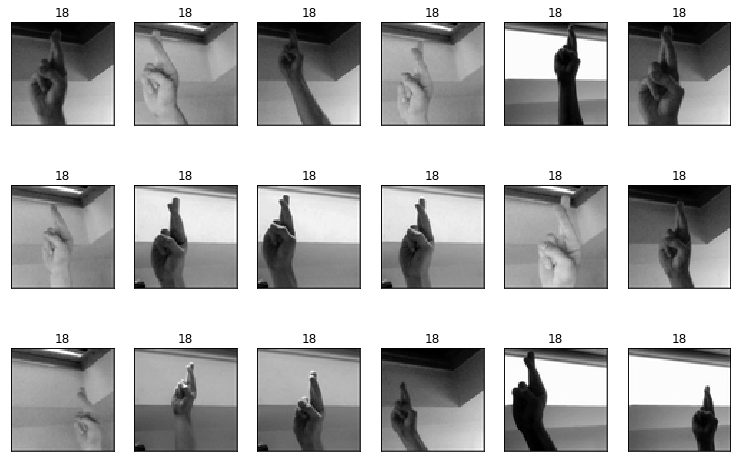

In [10]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, y, 72, 72) # defaults to showing a 3 by 6 subset of the faces

Based on the result of Lab2, we decide to choose Kernel PCA to do the demension reduction.

In [11]:
%%time
from sklearn.decomposition import KernelPCA

n_components = 300
print ("Extracting the top %d eigenfaces from %d faces, not calculating inverse transform" % (n_components, X.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=False, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(X.copy())

Extracting the top 300 eigenfaces from 4176 faces, not calculating inverse transform
CPU times: user 13.8 s, sys: 781 ms, total: 14.5 s
Wall time: 8.37 s


In [12]:
%%time
#  THIS  TAKES A LONG TIME TO RUN
from sklearn.decomposition import KernelPCA

n_components = 300
print ("Extracting the top %d eigenfaces from %d faces, ALSO getting inverse transform" % (n_components, X.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(X.copy())

Extracting the top 300 eigenfaces from 4176 faces, ALSO getting inverse transform
CPU times: user 18.9 s, sys: 805 ms, total: 19.7 s
Wall time: 10.3 s


In [14]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

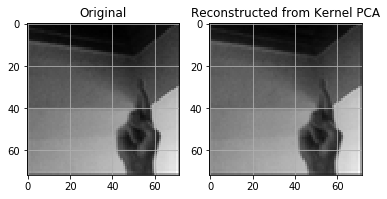

In [15]:
idx_to_reconstruct = 100    
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(kpca,X_idx.reshape(1, -1))

plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((72, 72)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((72, 72)), cmap=plt.cm.gray)
plt.title('Reconstructed from Kernel PCA')
plt.grid()

## Evaluation Choosing (30 points total)
### Metric choose and reason
There are four metrics methods, which are precision, recall, F1 and accuracy. Precision foucus on the false positive rate, and recall focuses on the false negative rate. F1 focuses on both false positive and false negative rate. Accuracy is about the instance rate we predict correctly.<br />
In our case study, false negative means that the child sent a gesture for help, but we did not recognize it. Compared with the situation that we mistake other gestures as a distress gesture, minimize false negative contribute more to saving the child. We would rather increase the value of the false positive, increase the workload, and not miss a clue that may appear which is false negative rate. So we want to minimize the false negative rate, that is the reason we choose recall. <br />
The function of recall as below:
$$Recall_{macro} = \frac{ T_{1} + ... + T_{n}}{(T_{1} + ... + T_{n} + F_{1} + ... + F_{n})*n}$$


### Divide Dataset
[15 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time. Convince the reader that your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 
Important: You should use your chosen evaluation criteria and chosen method for dividing train/test data throughout the report. For example, arguing that f-score is the best evaluation method, but then using accuracy in a grid search will be regarded as a conceptual error and graded accordingly. 
For spliting data, we can use Kfold and StratifiedShuffleSplit(). First, in KFolds, each test set should not overlap, even with shuffle. With KFolds and shuffle, the data is shuffled once at the start, and then divided into the number of desired splits. The test data is always one of the splits, the train data is the rest. In ShuffleSplit, the data is shuffled every time, and then split. This means the test sets may overlap between the splits.
Compared with KFold, StratifiedShuffleSplit is a very practical function. Before data sets are divided, shuffling operation should be carried out first; otherwise, overfitting is likely to occur and the generalization ability of the model will decline. Furthermore, speed reduction, speed of running data is also very important for our modeling. <br />
In our dataset, we use two method to split our data. At beginning, we split the data from training set and testing set, the ratio is 8:2. The training dataset is used to build the model and testing dataset is to test it.
In the process of hyper-parameters tuning, we use stratifiedShuffleSplit approach to split dataset to prevent overfitting and reduce the running time, which is necessary because it takes much time to iterate 200 times. Furthermore, to avoid data snooping, because the data type we input into the model in future is unknown. Such being the case, we also need to split training set into validation set and training set where we can better training our hyper-parameters and then we put the trained hyperparameters in the validation data to check if it is a good set of parameters or not. Finally, the best parameters were selected and put into the testing data to observe the results. In the process of split data, we divide the whole dataset into 10 folds, where 1 fold acts as testing set and others act as training set. Then we divide the training set evenly, as training set and validation set respectively.




In [11]:
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Training data instances number:",X_train.shape[0])
print("Testing data instances number:",X_test.shape[0])

Training data instances number: 3340
Testing data instances number: 836


## Modeling (45 points total)
All modeling code must be written using only the instructor's template code. Do NOT copy this implementation form anywhere online. Not fully implementing the back propagation algorithm will result in a zero for the entire assignment.

### Multi-layer Perception

The following part is mostly from Dr.Larson's. And we did some modification on it to achieve our multi-layer perception.    
We change A4 the output layer and make A2 iterativly training as the hidden layer of our neural network. To make A2 iterativly training, we add a for loop in feedforward process. Basically, we only add one layer(with changes of get_gradient function and other functions) making this neural network a Three layer neural. But with the hidden_layer training, it could become multi_layer neural network with more precise result.
We add a new parameter * hidden_layer * to customize our implementation of the multi-layer perception. Through this, we could support for any number of hidden layers.  
We also import all packages we need in this part firstly.


In [12]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import sys
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None, hidden_layer = 1):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.hidden_layer = hidden_layer
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        # print("W1",self.n_hidden)
        
        # We add a hidden layer
        W2_num_elems = (self.n_hidden + 1)*self.n_hidden
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden, self.n_hidden + 1)
        
        W3_num_elems = (self.n_hidden + 1)*self.n_output_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2, W3
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))
    
    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A4)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term

In [13]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2, W3, hidden_layer):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for input layer -> hidden layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a4 : activations into layer (or output layer)
        z1-z3 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        
        # train the hidden_layers
        for num in range(hidden_layer):
            A2 = self._sigmoid(Z1)
            A2 = self._add_bias_unit(A2, how='row')
            Z2 = W2 @ A2
        
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # backpropagation
        grad1 = np.zeros(W1.shape)
        grad2 = np.zeros(W2.shape)
        grad3 = np.zeros(W3.shape)
        
        # for each instance's activations 
        for (a1,a2,a3,a4, y) in zip(A1.T,A2.T,A3.T,A4.T,Y_enc.T):
            
            dJ_dz3 = -2*(y - a4)*a4*(1-a4) # output layer
            
            dJ_dz2 = (dJ_dz3 @ W3) @ np.diag(a3*(1-a3))   
            
            dJ_dz1 = dJ_dz2[1:] @ W2 @ np.diag(a2*(1-a2)) 
       
            grad3 += dJ_dz3[:,np.newaxis]  @ a3[np.newaxis,:]
            grad2 += dJ_dz2[1:,np.newaxis] @ a2[np.newaxis,:]
            grad1 += dJ_dz1[1:,np.newaxis] @ a1[np.newaxis,:] 
            # don't incorporate bias term in the z1 gradient 
            # (its added in a2 from another layer)
            

        # regularize weights that are not bias terms
        grad1[:, 1:] += (W1[:, 1:] * self.l2_C)
        grad2[:, 1:] += (W2[:, 1:] * self.l2_C)
        grad3[:, 1:] += (W3[:, 1:] * self.l2_C)
        

        return grad1, grad2, grad3
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3, self.hidden_layer)
        # A1, Z1, A2, Z2, A3, Z3, A4
        y_pred = np.argmax(A4, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data,self.W1,self.W2,self.W3, self.hidden_layer)
            
            cost = self._cost(A4,Y_enc,self.W1,self.W2,self.W3)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2, grad3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, Z1=Z1, Z2=Z2, Z3=Z3, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2, W3=self.W3)

            self.W1 -= self.eta * grad1
            self.W2 -= self.eta * grad2
            self.W3 -= self.eta * grad3
            

        return self

We built up a new neural work in 5 layers, each layer has 50 neurals and do 200 iterations.  

In [14]:
params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              hidden_layer = 3) # hidden layer number

Then we list four types evaluation metrics. And you can check different result of this 5 layer model. But before we metion the reasion, we decided to use recall metric as our evaluation approach. Comparing with other metrics, the recall score is 0.28 which is nearly approach the accuracy score and higher than precision and F1 score. 

In [15]:
%%time 
nn = TwoLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=10)
yhat = nn.predict(X_test)
print('Test accuracy_score:',accuracy_score(y_test,yhat))
print('Test recall_score:',recall_score(y_test,yhat,average='macro'))
print('Test precision_score:',precision_score(y_test,yhat,average='macro'))
print('Test f1_score:',f1_score(y_test,yhat,average='macro')) 

Epoch: 200/200

Test accuracy_score: 0.028708133971291867
Test recall_score: 0.02835611300523581
Test precision_score: 0.015216147463366877
Test f1_score: 0.011227350281243328
CPU times: user 4min 29s, sys: 34.4 s, total: 5min 3s
Wall time: 4min 22s


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


We build a CustomizedMLP class. In this class, we inherit TwoLayerPerceptron class which can customize the number of layers. So we could not only change the number of layers, but we could customized selectable phi function for the initial layer and hidden layer: either sigmoid or linear and a selectable cost function when instantiated: either quadratic or cross entropy. 



We add a new parameter * linear_hidden_layer * to customize our implementation of the activation phi function. Our default is using sigmoid. Through this, we could change the phi function either sigmoid or linear in initial layer and hidden layer. 

We add a new parameter * cross_entropy * to customize our implementation of the cost function. Our cost function default is cross_entropy, so we could change the cost function either quadratic or cross entropy in each back propagation and update the each weight of gradient to minimize our cost function.  

In [23]:
# code adapted from https://github.com/jakecarlson1/machine-learning-labs/blob/master/Lab5/Lab%205%20-%20Evaluation%20and%20Multi-Layer%20Perceptron.ipynb
class CustomizedMLP(TwoLayerPerceptron):
    
    def __init__(self,
                 linear_hidden_layer=False, 
                 cross_entropy=False,
                 **kwds):
        # but keep other keywords
        super().__init__(**kwds)
        
        self.linear_hidden_layer = linear_hidden_layer # default is False
        self.cross_entropy = cross_entropy
    
    def _linear(self, z):
        return z
    
    def _feedforward(self, X, W1, W2, W3, hidden_layer):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for input layer -> hidden layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a4 : activations into layer (or output layer)
        z1-z3 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        
        for num in range(hidden_layer):
            if self.linear_hidden_layer:
                A2 = self._linear(Z1)
            else: A2 = self._sigmoid(Z1)
            A2 = self._add_bias_unit(A2, how='row')
            Z2 = W2 @ A2
        
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4

    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        # Compute gradient step using backpropagation.
        # backpropagation
        grad1 = np.zeros(W1.shape)
        grad2 = np.zeros(W2.shape)
        grad3 = np.zeros(W3.shape)
        
        # for each instance's activations 
        for (a1,a2,a3,a4, y) in zip(A1.T,A2.T,A3.T,A4.T,Y_enc.T):
            if self.cross_entropy:
                dJ_dz3 = (a4 - y) # output layer cross entropy
            else: 
                dJ_dz3 = -2*(y - a4)*a4*(1-a4) # quadratic
            
            dJ_dz2 = (dJ_dz3 @ W3) @ np.diag(a3*(1-a3))
            
            dJ_dz1 = dJ_dz2[1:] @ W2 @ np.diag(a2*(1-a2)) 
            
            grad3 += dJ_dz3[:,np.newaxis]  @ a3[np.newaxis,:]
            grad2 += dJ_dz2[1:,np.newaxis] @ a2[np.newaxis,:]
            grad1 += dJ_dz1[1:,np.newaxis] @ a1[np.newaxis,:] 
            # don't incorporate bias term in the z1 gradient 
            # (its added in a2 from another layer)
            
        # regularize weights that are not bias terms
        grad1[:, 1:] += (W1[:, 1:] * self.l2_C)
        grad2[:, 1:] += (W2[:, 1:] * self.l2_C)
        grad3[:, 1:] += (W3[:, 1:] * self.l2_C)
        
        return grad1, grad2, grad3
    

We set up a new model parameters which phi function is linear and cost function is cross entropy. 

In [16]:
params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=100, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              hidden_layer = 3, 
              linear_hidden_layer = True,
              cross_entropy = False)

Then we get the accuracy of this model in testing set, 0.033

In [25]:
%%time 
#nn = TwoLayerPerceptron(**params)
nn = CustomizedMLP(**params)
nn.fit(X_train, y_train, print_progress=10)
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

Epoch: 100/100

Test acc: 0.03349282296650718
CPU times: user 2min 2s, sys: 6.74 s, total: 2min 9s
Wall time: 1min 44s


### Hyper-Parameters Tuning
Tune the hyper-parameters of your MLP model (phi function, objective function, and number of layers). We set up the hidden layer in to 3, 4, 5, 6, 7. And each layer has two cost functions and two phi functions. In addition, we use StratifiedShuffleSplit as our metric evaluation. Therefore, there are totally having 5(different layers) * 2(different phi functions) * 2(different cost functions) = 20 combinations. 

And we decide to use 10 folds to tune our hyper paramters because it have 10 evaliation criteria and visualize 10 accuracy points in each combination which is more accuracy and obvious in our plot.

In [ ]:
hidden_layer = [3,4,5,6,7]
linear_hidden_layer = [True, False]
cross_entropy = [True, False]
combo = []
accuracy = []
for eachlayer in hidden_layer:
    for eachlinear in linear_hidden_layer:
        for eachentropy in cross_entropy:
            temp_combo = [eachlayer, eachlinear, eachentropy] # prepare for the plot x axis
            combo.append(temp_combo)
            
for each in combo:
    params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=20, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              hidden_layer = each[0],
              linear_hidden_layer = each[1],
              cross_entropy = each[2])
    
    # outer loop is 10 folders
    sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, 
                                 random_state=64)
    sssv = StratifiedShuffleSplit(n_splits=1, test_size=0.5,
                                  random_state=128)
    for train_index, test_index in sss.split(X, y):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
        
        # run once to get test and validation sets
        for test_idx, val_idx in sssv.split(X_train, y_train):
            X_val, y_val = X_test[val_idx], y_test[val_idx]
            X_test, y_test = X_test[test_idx], y_test[test_idx]
    
        nn = CustomizedMLP(**params)
        nn.fit(X_train, y_train, print_progress=10)
        yhat = nn.predict(X_test)
        accuracy.append(accuracy_score(y_test,yhat))
    # each.append(accuracy)

Epoch: 20/20

In [104]:
print(accuracy)

[0.039473684210526314, 0.03229665071770335, 0.03827751196172249, 0.03110047846889952, 0.039473684210526314, 0.03229665071770335, 0.03827751196172249, 0.03110047846889952, 0.039473684210526314, 0.03229665071770335, 0.03827751196172249, 0.03110047846889952, 0.039473684210526314, 0.03229665071770335, 0.03827751196172249, 0.03110047846889952, 0.039473684210526314, 0.03229665071770335, 0.03827751196172249, 0.03110047846889952]


In [105]:
hiddenlayer = []
linear = []
crossentropy = []
combonum = []
combocount = 1

for item in combo:
    for i in range(10):
        hiddenlayer.append(item[0])
        linear.append(item[1])
        crossentropy.append(item[2])
        combonum.append(combocount)
    combocount = combocount + 1
    
d = {'hidden layer': hiddenlayer, 'linear': linear, 
     'cross entropy': crossentropy, 'accuracy%': accuracy, 'combonum':combonum}
df = pd.DataFrame(data = d) 
df['accuracy%'] = df['accuracy%']*100
print(df)   

    hidden layer  linear  cross entropy  accuracy%
0              3    True           True   3.947368
1              3    True          False   3.229665
2              3   False           True   3.827751
3              3   False          False   3.110048
4              4    True           True   3.947368
5              4    True          False   3.229665
6              4   False           True   3.827751
7              4   False          False   3.110048
8              5    True           True   3.947368
9              5    True          False   3.229665
10             5   False           True   3.827751
11             5   False          False   3.110048
12             6    True           True   3.947368
13             6    True          False   3.229665
14             6   False           True   3.827751
15             6   False          False   3.110048
16             7    True           True   3.947368
17             7    True          False   3.229665
18             7   False       

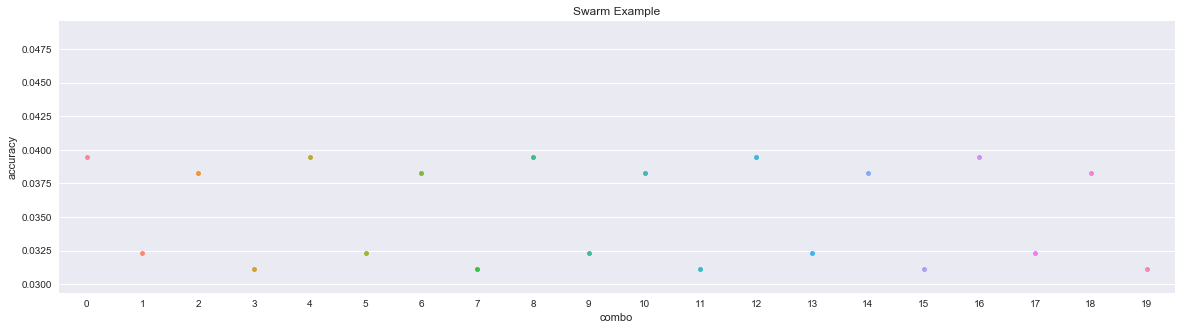

In [108]:
plt.subplots(figsize=(20, 10))

sns.swarmplot(x = df['combonum'], y = df['accuracy%'])
plt.title('Swarm Example')

plt.show()

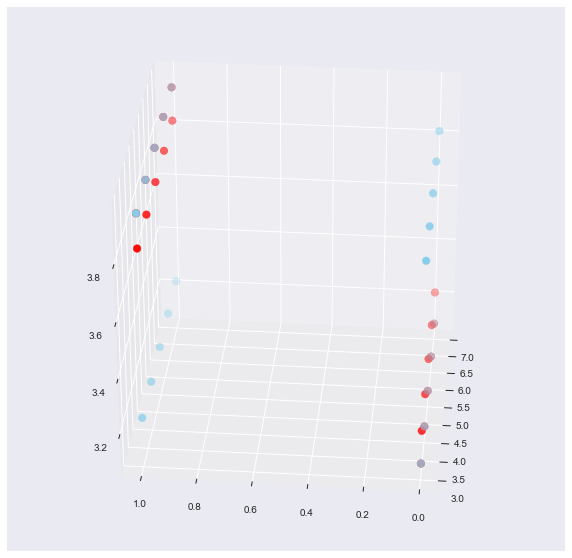

In [106]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['hidden layer'], df['linear'], df['accuracy%'], c='skyblue', s=60)
ax.scatter(df['hidden layer'], df['cross entropy'], df['accuracy%'], c='red', s=60)
# ax = plt.scatter(x=df['hidden layer'], y=df['accuracy'],c='r')
ax.view_init(30, 185)
plt.show()

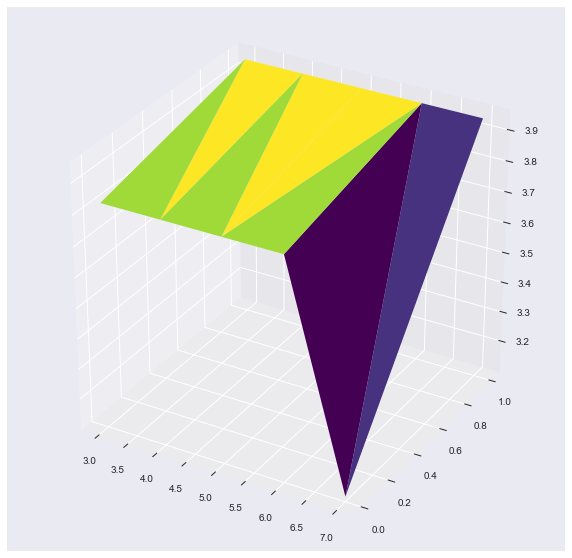

In [107]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['hidden layer'], df['linear'], df['accuracy%'], cmap=plt.cm.viridis, linewidth=0.2)

### Visualization
[10 points] Visualize the magnitude of the gradients in each layer of the neural network versus the training iteration. Do the gradients stay consistent in each layer?

## Exceptional Work (10 points total)
Implement two more phi functions: ReLU and SiLU (also called Swish). Compare their performance to the linear and sigmoid phi functions. 

In [116]:
class MLPwithReLUandSiLU(CustomizedMLP):
    
    def __init__(self,
                 phi = 'sigmoid',
                 **kwds):
        # but keep other keywords
        super().__init__(**kwds)
        
        self.phi = phi
    
    def _relu(self, z):
        return np.maximum(0,z.copy())
    
    def _silu(self, z):
        return z*expit(z)
    
    def _feedforward(self, X, W1, W2, W3, hidden_layer):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for input layer -> hidden layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a4 : activations into layer (or output layer)
        z1-z3 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        
        for num in range(hidden_layer):
            if self.phi == 'linear':
                A2 = self._linear(Z1)
            elif self.phi == 'relu':
                A2 = self._relu(Z1)
            elif self.phi == 'silu':
                A2 = self._silu(Z1)
            else: A2 = self._sigmoid(Z1)
            A2 = self._add_bias_unit(A2, how='row')
            Z2 = W2 @ A2
        
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4

In [118]:
phi = ['linear','sigmoid','relu','silu']
for p in phi:
    params = dict(n_hidden=50, 
                  C=0.1, # tradeoff L2 regularizer
                  epochs=200, # iterations
                  eta=0.001,  # learning rate
                  random_state=1,
                  hidden_layer = 3,
                  phi = p,
                  cross_entropy = True)
    nn = MLPwithReLUandSiLU(**params)
    nn.fit(X_train, y_train, print_progress=10)
    yhat = nn.predict(X_test)
    print('Test acc of',p,':',accuracy_score(y_test,yhat))

Epoch: 200/200

Test acc of linear : 0.03229665071770335


Epoch: 200/200

Test acc of sigmoid : 0.01674641148325359


Epoch: 200/200

Test acc of relu : 0.034688995215311005


Epoch: 200/200

Test acc of silu : 0.034688995215311005


From above four types of phi functions in test accuracy, we can see the best performance is Relu and Silu functions. 